## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [2]:
df = pd.read_csv("C:/Users/rajeev/Downloads/H2HBABBA2855.csv")

In [3]:
df.dtypes # checking data types

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [4]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200782669,SYGMA associates,2019-10-25 00:00:00,2019.0,1.929956e+09,2019-10-09,20191003,20191009,20191024.0,USD,RV,1.0,NaN,3311.27,20191009.0,NAA8,1.929956e+09,0
1,U001,0200778998,CE associates,2019-03-08 00:00:00,2019.0,1.928824e+09,2019-02-21,20190220,20190221,20190308.0,USD,RV,1.0,NaN,95728.31,20190221.0,NAA8,1.928824e+09,0
2,U001,0100014187,GAD foundation,2019-09-03 00:00:00,2019.0,1.929735e+09,2019-08-13,20190812,20190813,20190902.0,USD,RV,1.0,NaN,70306.33,20190813.0,NAD1,1.929735e+09,0
3,U001,0200772670,ASSOCIAT corporation,2019-01-29 00:00:00,2019.0,1.928616e+09,2019-01-14,20190114,20190114,20190129.0,USD,RV,1.0,NaN,72046.76,20190114.0,NAU5,1.928616e+09,0
4,U001,0200705742,DOT co,2020-02-10 00:00:00,2020.0,1.930437e+09,2020-01-24,20200124,20200124,20200225.0,USD,RV,1.0,NaN,864.53,20200124.0,NA32,1.930437e+09,0


In [5]:
df.shape # checking shapes

(50000, 19)

## Spliting dataset into train and final-test

In [6]:
# spliting data according to null values in clear_date
test_data = df[df.clear_date.isnull()]  # this will be the final testing dataset

In [7]:
test_data.shape # testing data has 10000 rows

(10000, 19)

In [8]:
# removing null columns from clear_date of training dataset 
df = df[df.clear_date.notnull()]

In [9]:
df.shape # training data has 40000 rows

(40000, 19)

## Convert all dates to date format

In [10]:
# converting all dates to timedate format
df['clear_date'] = pd.to_datetime(df.clear_date)
df['posting_date'] = pd.to_datetime(df.posting_date)
df.head()

df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')

df['due_in_date'] = df['due_in_date'].astype(int)
df['baseline_create_date'] = df['baseline_create_date'].astype(int)

df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200782669,SYGMA associates,2019-10-25,2019.0,1.929956e+09,2019-10-09,2019-10-03,2019-10-09,2019-10-24,USD,RV,1.0,NaN,3311.27,2019-10-09,NAA8,1.929956e+09,0
1,U001,0200778998,CE associates,2019-03-08,2019.0,1.928824e+09,2019-02-21,2019-02-20,2019-02-21,2019-03-08,USD,RV,1.0,NaN,95728.31,2019-02-21,NAA8,1.928824e+09,0
2,U001,0100014187,GAD foundation,2019-09-03,2019.0,1.929735e+09,2019-08-13,2019-08-12,2019-08-13,2019-09-02,USD,RV,1.0,NaN,70306.33,2019-08-13,NAD1,1.929735e+09,0
3,U001,0200772670,ASSOCIAT corporation,2019-01-29,2019.0,1.928616e+09,2019-01-14,2019-01-14,2019-01-14,2019-01-29,USD,RV,1.0,NaN,72046.76,2019-01-14,NAU5,1.928616e+09,0
4,U001,0200705742,DOT co,2020-02-10,2020.0,1.930437e+09,2020-01-24,2020-01-24,2020-01-24,2020-02-25,USD,RV,1.0,NaN,864.53,2020-01-24,NA32,1.930437e+09,0


In [11]:
# using to ordinal function to convert time date to proleptic Gregorian ordinal (no. of days from 01/01/01 to current date)
df['clear_date']=df['clear_date'].map(dt.datetime.toordinal)
df['posting_date']=df['posting_date'].map(dt.datetime.toordinal)
df['document_create_date']=df['document_create_date'].map(dt.datetime.toordinal)
df['document_create_date.1']=df['document_create_date.1'].map(dt.datetime.toordinal)
df['due_in_date']=df['due_in_date'].map(dt.datetime.toordinal)
df['baseline_create_date']=df['baseline_create_date'].map(dt.datetime.toordinal)

In [12]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                  int64
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [13]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200782669,SYGMA associates,737357,2019.0,1.929956e+09,737341,737335,737341,737356,USD,RV,1.0,NaN,3311.27,737341,NAA8,1.929956e+09,0
1,U001,0200778998,CE associates,737126,2019.0,1.928824e+09,737111,737110,737111,737126,USD,RV,1.0,NaN,95728.31,737111,NAA8,1.928824e+09,0
2,U001,0100014187,GAD foundation,737305,2019.0,1.929735e+09,737284,737283,737284,737304,USD,RV,1.0,NaN,70306.33,737284,NAD1,1.929735e+09,0
3,U001,0200772670,ASSOCIAT corporation,737088,2019.0,1.928616e+09,737073,737073,737073,737088,USD,RV,1.0,NaN,72046.76,737073,NAU5,1.928616e+09,0
4,U001,0200705742,DOT co,737465,2020.0,1.930437e+09,737448,737448,737448,737480,USD,RV,1.0,NaN,864.53,737448,NA32,1.930437e+09,0


## Sorting database according to posting_date

In [14]:
df['posting_date'].dtype

dtype('int64')

In [15]:
df.sort_values(['posting_date'],inplace=True,ignore_index=True) # sorting data as per posting_data

In [16]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200779906,BOZZU in,737075,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,1.0,NaN,94123.08,737058,NAA8,1.928543e+09,0
1,U001,0200769623,WAL-MAR corp,737070,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,1.0,NaN,45645.00,737058,NAH4,1.928543e+09,0
2,U001,0200769623,WAL-MAR foundation,737068,2019.0,1.928541e+09,737058,737057,737058,737073,USD,RV,1.0,NaN,8286.44,737058,NAH4,1.928541e+09,0
3,U001,0200769623,WAL-MAR,737068,2019.0,1.928538e+09,737058,737057,737058,737073,USD,RV,1.0,NaN,51600.07,737058,NAH4,1.928538e+09,0
4,U001,0200762301,C&S WH llc,737074,2019.0,1.928540e+09,737058,737057,737058,737073,USD,RV,1.0,NaN,13866.83,737058,NAC6,1.928540e+09,0


## Removing null values from training dataset

In [17]:
df.isnull().sum() # number of null values in the dataset

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [18]:
df.isnull().mean()

business_code             0.000000
cust_number               0.000000
name_customer             0.000000
clear_date                0.000000
buisness_year             0.000000
doc_id                    0.000000
posting_date              0.000000
document_create_date      0.000000
document_create_date.1    0.000000
due_in_date               0.000000
invoice_currency          0.000000
document type             0.000000
posting_id                0.000000
area_business             1.000000
total_open_amount         0.000000
baseline_create_date      0.000000
cust_payment_terms        0.000000
invoice_id                0.000125
isOpen                    0.000000
dtype: float64

In [19]:
df.drop(columns=['area_business'],inplace=True) # droping area_business because whole column is empty

In [20]:
df.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                5
isOpen                    0
dtype: int64

In [21]:
df.dropna(subset=["invoice_id"],inplace=True) # removing rows with null values of the column invoice_id

In [22]:
df.shape

(39995, 18)

In [23]:
df.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

## Removing Duplicates

In [24]:
# Removing duplicates from rows
df.duplicated().sum() #print no. of duplicated values

827

In [25]:
df.loc[df.duplicated(),:] 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
104,U001,0200799367,MCL llc,737074,2019.0,1.928543e+09,737059,737058,737059,737074,USD,RV,1.0,96589.32,737059,NAA8,1.928543e+09,0
164,U001,0200769623,WAL-MAR co,737070,2019.0,1.928543e+09,737060,737058,737060,737075,USD,RV,1.0,17249.88,737060,NAH4,1.928543e+09,0
257,U001,0200718130,SYSCO F,737077,2019.0,1.928550e+09,737062,737061,737062,737077,USD,RV,1.0,7068.08,737062,NAA8,1.928550e+09,0
381,U001,0200759878,SA foundation,737081,2019.0,1.928549e+09,737063,737060,737063,737078,USD,RV,1.0,21330.50,737063,NAH4,1.928549e+09,0
386,U001,0200762950,HAR systems,737077,2019.0,1.928550e+09,737063,737061,737063,737078,USD,RV,1.0,127017.88,737063,NAA8,1.928550e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39824,U001,0200769623,WAL-MAR llc,737501,2020.0,1.930559e+09,737480,737478,737480,737495,USD,RV,1.0,8328.33,737480,NAH4,1.930559e+09,0
39853,U001,0200337148,COAS corp,737495,2020.0,1.930571e+09,737480,737481,737480,737495,USD,RV,1.0,67924.87,737480,NAA8,1.930571e+09,0
39924,U001,0200769623,WAL-MAR trust,737493,2020.0,1.930566e+09,737481,737480,737481,737496,USD,RV,1.0,1898.90,737481,NAH4,1.930566e+09,0
39954,U001,0200725421,BEN in,737495,2020.0,1.930566e+09,737481,737480,737481,737496,USD,RV,1.0,29860.41,737481,NAA8,1.930566e+09,0


In [26]:
df.drop_duplicates(keep='first',inplace=True) # droping duplicate values 

In [27]:
df.shape

(39168, 18)

In [28]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                  int64
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## Removing constant features

In [29]:
#  Applying variance threshold
from sklearn.feature_selection import VarianceThreshold

In [30]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200779906,BOZZU in,737075,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,1.0,94123.08,737058,NAA8,1.928543e+09,0
1,U001,0200769623,WAL-MAR corp,737070,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,1.0,45645.00,737058,NAH4,1.928543e+09,0
2,U001,0200769623,WAL-MAR foundation,737068,2019.0,1.928541e+09,737058,737057,737058,737073,USD,RV,1.0,8286.44,737058,NAH4,1.928541e+09,0
3,U001,0200769623,WAL-MAR,737068,2019.0,1.928538e+09,737058,737057,737058,737073,USD,RV,1.0,51600.07,737058,NAH4,1.928538e+09,0
4,U001,0200762301,C&S WH llc,737074,2019.0,1.928540e+09,737058,737057,737058,737073,USD,RV,1.0,13866.83,737058,NAC6,1.928540e+09,0


In [31]:
df.dtypes #Variance Threshold only work on int/float 

business_code              object
cust_number                object
name_customer              object
clear_date                  int64
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [32]:
#storing converted datatypes in temp dataframe
df_temp = df.select_dtypes(exclude=['object'])
df_temp.head()

,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
0,737075,2019.0,1.928543e+09,737058,737058,737058,737073,1.0,94123.08,737058,1.928543e+09,0
1,737070,2019.0,1.928543e+09,737058,737058,737058,737073,1.0,45645.00,737058,1.928543e+09,0
2,737068,2019.0,1.928541e+09,737058,737057,737058,737073,1.0,8286.44,737058,1.928541e+09,0
3,737068,2019.0,1.928538e+09,737058,737057,737058,737073,1.0,51600.07,737058,1.928538e+09,0
4,737074,2019.0,1.928540e+09,737058,737057,737058,737073,1.0,13866.83,737058,1.928540e+09,0


In [33]:
var_thresh = VarianceThreshold(threshold=0)

In [34]:
var_thresh.fit(df_temp)

VarianceThreshold(threshold=0)

In [35]:
# The false value is a constant feature
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [36]:
df_temp.columns[var_thresh.get_support()] # non constant features 

Index(['clear_date', 'buisness_year', 'doc_id', 'posting_date',
       'document_create_date', 'document_create_date.1', 'due_in_date',
       'total_open_amount', 'baseline_create_date', 'invoice_id'],
      dtype='object')

In [37]:
# storing constant features
constant_columns = [column for column in df_temp.columns 
                   if column not in df_temp.columns[var_thresh.get_support()]]

In [38]:
# printing constant feature(s)
for features in constant_columns:
    print(features)

posting_id
isOpen


In [39]:
# droping constant feature(s)
df.drop(constant_columns,axis=1,inplace=True)

In [40]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200779906,BOZZU in,737075,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,94123.08,737058,NAA8,1.928543e+09
1,U001,0200769623,WAL-MAR corp,737070,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,45645.00,737058,NAH4,1.928543e+09
2,U001,0200769623,WAL-MAR foundation,737068,2019.0,1.928541e+09,737058,737057,737058,737073,USD,RV,8286.44,737058,NAH4,1.928541e+09
3,U001,0200769623,WAL-MAR,737068,2019.0,1.928538e+09,737058,737057,737058,737073,USD,RV,51600.07,737058,NAH4,1.928538e+09
4,U001,0200762301,C&S WH llc,737074,2019.0,1.928540e+09,737058,737057,737058,737073,USD,RV,13866.83,737058,NAC6,1.928540e+09


In [41]:
df.shape #Constant Feature removed

(39168, 16)

## Removing Quasi-Constant Features

In [42]:
from sklearn.feature_selection import VarianceThreshold

In [43]:
# applying variance threshold
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200779906,BOZZU in,737075,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,94123.08,737058,NAA8,1.928543e+09
1,U001,0200769623,WAL-MAR corp,737070,2019.0,1.928543e+09,737058,737058,737058,737073,USD,RV,45645.00,737058,NAH4,1.928543e+09
2,U001,0200769623,WAL-MAR foundation,737068,2019.0,1.928541e+09,737058,737057,737058,737073,USD,RV,8286.44,737058,NAH4,1.928541e+09
3,U001,0200769623,WAL-MAR,737068,2019.0,1.928538e+09,737058,737057,737058,737073,USD,RV,51600.07,737058,NAH4,1.928538e+09
4,U001,0200762301,C&S WH llc,737074,2019.0,1.928540e+09,737058,737057,737058,737073,USD,RV,13866.83,737058,NAC6,1.928540e+09


In [44]:
df_temp = df.select_dtypes(exclude=['object'])
df_temp.head()

,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id
0,737075,2019.0,1.928543e+09,737058,737058,737058,737073,94123.08,737058,1.928543e+09
1,737070,2019.0,1.928543e+09,737058,737058,737058,737073,45645.00,737058,1.928543e+09
2,737068,2019.0,1.928541e+09,737058,737057,737058,737073,8286.44,737058,1.928541e+09
3,737068,2019.0,1.928538e+09,737058,737057,737058,737073,51600.07,737058,1.928538e+09
4,737074,2019.0,1.928540e+09,737058,737057,737058,737073,13866.83,737058,1.928540e+09


In [45]:
var_thresh = VarianceThreshold(threshold=0.3)

In [46]:
var_thresh.fit(df_temp)

VarianceThreshold(threshold=0.3)

In [47]:
var_thresh.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [48]:
df_temp.columns[var_thresh.get_support()]

Index(['clear_date', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'total_open_amount',
       'baseline_create_date', 'invoice_id'],
      dtype='object')

In [49]:
# storing quasi constant features
quasi_columns = [column for column in df_temp.columns 
                   if column not in df_temp.columns[var_thresh.get_support()]]

In [50]:
# printing quasi constant feature(s)
for features in quasi_columns:
    print(features)

buisness_year


In [51]:
# droping quasi constant feature(s)
df.drop(quasi_columns,axis=1,inplace=True)

In [52]:
df.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200779906,BOZZU in,737075,1.928543e+09,737058,737058,737058,737073,USD,RV,94123.08,737058,NAA8,1.928543e+09
1,U001,0200769623,WAL-MAR corp,737070,1.928543e+09,737058,737058,737058,737073,USD,RV,45645.00,737058,NAH4,1.928543e+09
2,U001,0200769623,WAL-MAR foundation,737068,1.928541e+09,737058,737057,737058,737073,USD,RV,8286.44,737058,NAH4,1.928541e+09
3,U001,0200769623,WAL-MAR,737068,1.928538e+09,737058,737057,737058,737073,USD,RV,51600.07,737058,NAH4,1.928538e+09
4,U001,0200762301,C&S WH llc,737074,1.928540e+09,737058,737057,737058,737073,USD,RV,13866.83,737058,NAC6,1.928540e+09


In [53]:
df.shape

(39168, 15)

## Checking Unique Values with object datatype

In [54]:
# Checking for object data types
for col in df:
    if df[col].dtypes == object:
        print(col , ' : ', len(df[col].unique()))

business_code  :  6
cust_number  :  1335
name_customer  :  3887
invoice_currency  :  2
document type  :  1
cust_payment_terms  :  69


## Applying count of frequency encoding on business_code

In [55]:
df_frequency_map = df.business_code.value_counts().to_dict()

In [56]:
df.business_code = df.business_code.map(df_frequency_map)

In [57]:
df.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,35450,0200779906,BOZZU in,737075,1.928543e+09,737058,737058,737058,737073,USD,RV,94123.08,737058,NAA8,1.928543e+09
1,35450,0200769623,WAL-MAR corp,737070,1.928543e+09,737058,737058,737058,737073,USD,RV,45645.00,737058,NAH4,1.928543e+09
2,35450,0200769623,WAL-MAR foundation,737068,1.928541e+09,737058,737057,737058,737073,USD,RV,8286.44,737058,NAH4,1.928541e+09
3,35450,0200769623,WAL-MAR,737068,1.928538e+09,737058,737057,737058,737073,USD,RV,51600.07,737058,NAH4,1.928538e+09
4,35450,0200762301,C&S WH llc,737074,1.928540e+09,737058,737057,737058,737073,USD,RV,13866.83,737058,NAC6,1.928540e+09


## Applying one hot encoding on invoice_currency

In [58]:
df_temp = pd.get_dummies(df['invoice_currency'],drop_first=True)

In [59]:
df = pd.concat([df_temp,df],axis=1)

In [60]:
df.drop('invoice_currency',axis=1,inplace=True)

In [61]:
df.head()

,USD,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,1,35450,0200779906,BOZZU in,737075,1.928543e+09,737058,737058,737058,737073,RV,94123.08,737058,NAA8,1.928543e+09
1,1,35450,0200769623,WAL-MAR corp,737070,1.928543e+09,737058,737058,737058,737073,RV,45645.00,737058,NAH4,1.928543e+09
2,1,35450,0200769623,WAL-MAR foundation,737068,1.928541e+09,737058,737057,737058,737073,RV,8286.44,737058,NAH4,1.928541e+09
3,1,35450,0200769623,WAL-MAR,737068,1.928538e+09,737058,737057,737058,737073,RV,51600.07,737058,NAH4,1.928538e+09
4,1,35450,0200762301,C&S WH llc,737074,1.928540e+09,737058,737057,737058,737073,RV,13866.83,737058,NAC6,1.928540e+09


In [62]:
df.shape

(39168, 15)

## Removing unwanted columns

In [63]:
df.head()

,USD,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,1,35450,0200779906,BOZZU in,737075,1.928543e+09,737058,737058,737058,737073,RV,94123.08,737058,NAA8,1.928543e+09
1,1,35450,0200769623,WAL-MAR corp,737070,1.928543e+09,737058,737058,737058,737073,RV,45645.00,737058,NAH4,1.928543e+09
2,1,35450,0200769623,WAL-MAR foundation,737068,1.928541e+09,737058,737057,737058,737073,RV,8286.44,737058,NAH4,1.928541e+09
3,1,35450,0200769623,WAL-MAR,737068,1.928538e+09,737058,737057,737058,737073,RV,51600.07,737058,NAH4,1.928538e+09
4,1,35450,0200762301,C&S WH llc,737074,1.928540e+09,737058,737057,737058,737073,RV,13866.83,737058,NAC6,1.928540e+09


In [64]:
# all these columns contains unique id's or names which may work as outliers for our model
df.drop(['cust_number','name_customer','document type','document_create_date.1'] , axis = 1 , inplace = True)

In [65]:
df.shape

(39168, 11)

## Creating Delay Column

In [66]:
df['clear_date'].dtype

dtype('int64')

In [67]:
df['delay'] = df['clear_date'] - df['due_in_date']

In [68]:
df.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1,35450,737075,1.928543e+09,737058,737058,737073,94123.08,737058,NAA8,1.928543e+09,2
1,1,35450,737070,1.928543e+09,737058,737058,737073,45645.00,737058,NAH4,1.928543e+09,-3
2,1,35450,737068,1.928541e+09,737058,737057,737073,8286.44,737058,NAH4,1.928541e+09,-5
3,1,35450,737068,1.928538e+09,737058,737057,737073,51600.07,737058,NAH4,1.928538e+09,-5
4,1,35450,737074,1.928540e+09,737058,737057,737073,13866.83,737058,NAC6,1.928540e+09,1


## Applying count of frequency encoding on cust_payment_terms

In [69]:
df_frequency_map = df.cust_payment_terms.value_counts().to_dict()

In [70]:
df_frequency_map

{'NAA8': 15595,
 'NAH4': 10699,
 'CA10': 2979,
 'NAC6': 1278,
 'NAM4': 1026,
 'NAAX': 932,
 'NAG2': 743,
 'NAD1': 727,
 'NAU5': 719,
 'NAGD': 622,
 'NA32': 592,
 'NAX2': 522,
 'NAM2': 432,
 'NA10': 352,
 'NAD5': 256,
 'NAVE': 235,
 'NAM1': 216,
 'NAVF': 195,
 'NAAW': 173,
 'NAWU': 123,
 'NAWN': 91,
 'NAVQ': 87,
 'NAVR': 74,
 'NAWP': 64,
 'NAUZ': 50,
 'CA30': 37,
 'NA3B': 37,
 'NAVM': 37,
 'NABG': 29,
 'NACB': 27,
 'NA38': 26,
 'NAD4': 20,
 'C106': 20,
 'NAB1': 18,
 'NAVL': 12,
 'NA25': 9,
 'NAM3': 9,
 'NAUP': 8,
 'NA84': 8,
 'NAVD': 7,
 'NA3F': 6,
 'CAB1': 6,
 'BR56': 5,
 'NAUI': 5,
 'NAV2': 5,
 'NATU': 4,
 'NAD8': 4,
 'NAV9': 4,
 'NATX': 4,
 'CAX2': 4,
 'B052': 3,
 'NATV': 3,
 'NAVC': 3,
 'NA8Q': 3,
 'NA9X': 3,
 'NA31': 2,
 'NAUN': 2,
 'NAWM': 2,
 'BR12': 2,
 'NANC': 2,
 'NATK': 2,
 'NATH': 1,
 'NATW': 1,
 '90M7': 1,
 'BR60': 1,
 'NAUY': 1,
 'NACE': 1,
 'NATM': 1,
 'NATJ': 1}

In [71]:
df.cust_payment_terms = df.cust_payment_terms.map(df_frequency_map)

In [72]:
df.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1,35450,737075,1.928543e+09,737058,737058,737073,94123.08,737058,15595,1.928543e+09,2
1,1,35450,737070,1.928543e+09,737058,737058,737073,45645.00,737058,10699,1.928543e+09,-3
2,1,35450,737068,1.928541e+09,737058,737057,737073,8286.44,737058,10699,1.928541e+09,-5
3,1,35450,737068,1.928538e+09,737058,737057,737073,51600.07,737058,10699,1.928538e+09,-5
4,1,35450,737074,1.928540e+09,737058,737057,737073,13866.83,737058,1278,1.928540e+09,1


## Data Visualisation

Text(0.5, 1.0, 'delay vs cust_payment_terms')

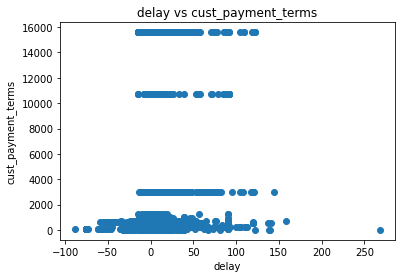

In [73]:
# total_open_amount vs due_in_date 
x = df['delay']
y = df['cust_payment_terms']
plt.scatter(x,y)
plt.xlabel("delay")
plt.ylabel("cust_payment_terms")
plt.title("delay vs cust_payment_terms")

#This shows us that customers with cust_payment_terms between 0 to 2000 made roughly 30% of their payment on time 
#and almost all customes paid their dues within 150 days

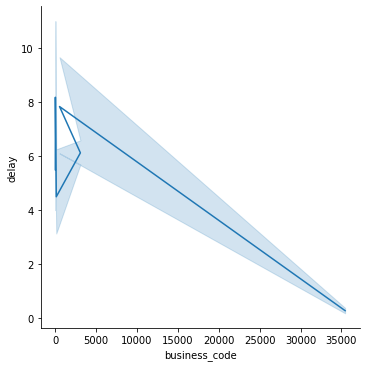

In [74]:
import seaborn as sns
sns.relplot(x="business_code", y="delay", sort=False, kind="line", data=df);
# This graph shows us that the delay decreased in an discending order of business_code

Text(0.5, 1.0, 'delay vs posting_date')

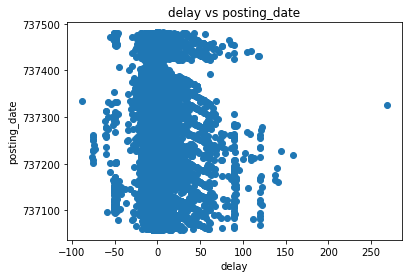

In [75]:
# total_open_amount vs due_in_date 
x = df['delay']
y = df['posting_date']
plt.scatter(x,y)
plt.xlabel("delay")
plt.ylabel("posting_date")
plt.title("delay vs posting_date")

#This also shows us the same trend that almost all customes paid their dues within 150 days

<AxesSubplot:xlabel='delay', ylabel='Density'>

<Figure size 432x432 with 0 Axes>

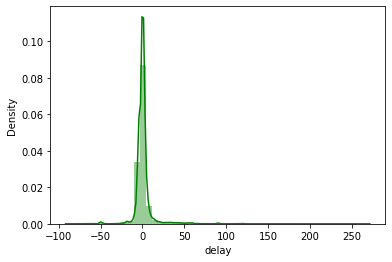

In [76]:
plt.figure(figsize=(6,6))
plt.figure(2)
sns.distplot(df['delay'],color='green')
# This graph is right skewed

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

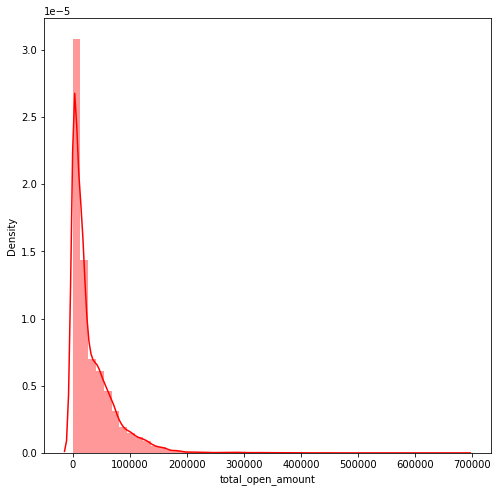

In [77]:
plt.figure(figsize=(8,8))
plt.figure(1)
sns.distplot(df['total_open_amount'],color='red')

In [78]:
# This graph is again right skewed ; could be removed from the dataset if low accuracy encountered

## Data preprocessing of Test_data

In [79]:
df.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1,35450,737075,1.928543e+09,737058,737058,737073,94123.08,737058,15595,1.928543e+09,2
1,1,35450,737070,1.928543e+09,737058,737058,737073,45645.00,737058,10699,1.928543e+09,-3
2,1,35450,737068,1.928541e+09,737058,737057,737073,8286.44,737058,10699,1.928541e+09,-5
3,1,35450,737068,1.928538e+09,737058,737057,737073,51600.07,737058,10699,1.928538e+09,-5
4,1,35450,737074,1.928540e+09,737058,737057,737073,13866.83,737058,1278,1.928540e+09,1


In [80]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
14,U001,0200762301,C&S WH systems,NaN,2020.0,1.930630e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,NaN,14169.42,20200311.0,NAC6,1.930630e+09,1
15,U001,0200762301,C&S WH associates,NaN,2020.0,1.930733e+09,2020-04-02,20200402,20200402,20200417.0,USD,RV,1.0,NaN,64394.42,20200402.0,NAC6,1.930733e+09,1
22,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930834e+09,2020-04-29,20200429,20200429,20200514.0,USD,RV,1.0,NaN,25333.15,20200429.0,NAH4,1.930834e+09,1
35,U001,0200799342,MITCH co,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200312,20200327.0,USD,RV,1.0,NaN,2183.30,20200312.0,NAA8,1.930643e+09,1
54,U001,0200726979,BJ'S us,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,NaN,212.41,20200331.0,NAA8,1.930724e+09,1


### Applying one hot encoding on invoice_currency

In [81]:
df_temp = pd.get_dummies(test_data['invoice_currency'],drop_first=True)
test_data = pd.concat([df_temp,test_data],axis=1)
test_data.drop('invoice_currency',axis=1,inplace=True)

In [82]:
test_data.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
14,1,U001,0200762301,C&S WH systems,NaN,2020.0,1.930630e+09,2020-03-11,20200310,20200311,20200326.0,RV,1.0,NaN,14169.42,20200311.0,NAC6,1.930630e+09,1
15,1,U001,0200762301,C&S WH associates,NaN,2020.0,1.930733e+09,2020-04-02,20200402,20200402,20200417.0,RV,1.0,NaN,64394.42,20200402.0,NAC6,1.930733e+09,1
22,1,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930834e+09,2020-04-29,20200429,20200429,20200514.0,RV,1.0,NaN,25333.15,20200429.0,NAH4,1.930834e+09,1
35,1,U001,0200799342,MITCH co,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200312,20200327.0,RV,1.0,NaN,2183.30,20200312.0,NAA8,1.930643e+09,1
54,1,U001,0200726979,BJ'S us,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,RV,1.0,NaN,212.41,20200331.0,NAA8,1.930724e+09,1


### Applying count pf frequency encoding on business_code

In [83]:
df_frequency_map = test_data.business_code.value_counts().to_dict()
test_data.business_code = test_data.business_code.map(df_frequency_map)

In [84]:
test_data.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
14,1,9179,0200762301,C&S WH systems,NaN,2020.0,1.930630e+09,2020-03-11,20200310,20200311,20200326.0,RV,1.0,NaN,14169.42,20200311.0,NAC6,1.930630e+09,1
15,1,9179,0200762301,C&S WH associates,NaN,2020.0,1.930733e+09,2020-04-02,20200402,20200402,20200417.0,RV,1.0,NaN,64394.42,20200402.0,NAC6,1.930733e+09,1
22,1,9179,0200769623,WAL-MAR llc,NaN,2020.0,1.930834e+09,2020-04-29,20200429,20200429,20200514.0,RV,1.0,NaN,25333.15,20200429.0,NAH4,1.930834e+09,1
35,1,9179,0200799342,MITCH co,NaN,2020.0,1.930643e+09,2020-03-12,20200312,20200312,20200327.0,RV,1.0,NaN,2183.30,20200312.0,NAA8,1.930643e+09,1
54,1,9179,0200726979,BJ'S us,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,RV,1.0,NaN,212.41,20200331.0,NAA8,1.930724e+09,1


In [85]:
df.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1,35450,737075,1.928543e+09,737058,737058,737073,94123.08,737058,15595,1.928543e+09,2
1,1,35450,737070,1.928543e+09,737058,737058,737073,45645.00,737058,10699,1.928543e+09,-3
2,1,35450,737068,1.928541e+09,737058,737057,737073,8286.44,737058,10699,1.928541e+09,-5
3,1,35450,737068,1.928538e+09,737058,737057,737073,51600.07,737058,10699,1.928538e+09,-5
4,1,35450,737074,1.928540e+09,737058,737057,737073,13866.83,737058,1278,1.928540e+09,1


### Converting all dates to date format

In [86]:
test_data['clear_date'] = pd.to_datetime(test_data.clear_date)
test_data['posting_date'] = pd.to_datetime(test_data.posting_date)
test_data.head()

test_data['document_create_date'] = pd.to_datetime(test_data['document_create_date'], format='%Y%m%d')
test_data['document_create_date.1'] = pd.to_datetime(test_data['document_create_date.1'], format='%Y%m%d')

test_data['due_in_date'] = test_data['due_in_date'].astype(int)
test_data['baseline_create_date'] = test_data['baseline_create_date'].astype(int)

test_data['due_in_date'] = pd.to_datetime(test_data['due_in_date'], format='%Y%m%d')
test_data['baseline_create_date'] = pd.to_datetime(test_data['baseline_create_date'], format='%Y%m%d')
test_data.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
14,1,9179,0200762301,C&S WH systems,NaT,2020.0,1.930630e+09,2020-03-11,2020-03-10,2020-03-11,2020-03-26,RV,1.0,NaN,14169.42,2020-03-11,NAC6,1.930630e+09,1
15,1,9179,0200762301,C&S WH associates,NaT,2020.0,1.930733e+09,2020-04-02,2020-04-02,2020-04-02,2020-04-17,RV,1.0,NaN,64394.42,2020-04-02,NAC6,1.930733e+09,1
22,1,9179,0200769623,WAL-MAR llc,NaT,2020.0,1.930834e+09,2020-04-29,2020-04-29,2020-04-29,2020-05-14,RV,1.0,NaN,25333.15,2020-04-29,NAH4,1.930834e+09,1
35,1,9179,0200799342,MITCH co,NaT,2020.0,1.930643e+09,2020-03-12,2020-03-12,2020-03-12,2020-03-27,RV,1.0,NaN,2183.30,2020-03-12,NAA8,1.930643e+09,1
54,1,9179,0200726979,BJ'S us,NaT,2020.0,1.930724e+09,2020-03-31,2020-03-31,2020-03-31,2020-04-15,RV,1.0,NaN,212.41,2020-03-31,NAA8,1.930724e+09,1


In [87]:
test_data['clear_date']=test_data['clear_date'].map(dt.datetime.toordinal)
test_data['posting_date']=test_data['posting_date'].map(dt.datetime.toordinal)
test_data['document_create_date']=test_data['document_create_date'].map(dt.datetime.toordinal)
test_data['document_create_date.1']=test_data['document_create_date.1'].map(dt.datetime.toordinal)
test_data['due_in_date']=test_data['due_in_date'].map(dt.datetime.toordinal)
test_data['baseline_create_date']=test_data['baseline_create_date'].map(dt.datetime.toordinal)

In [88]:
test_data.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
14,1,9179,0200762301,C&S WH systems,1,2020.0,1.930630e+09,737495,737494,737495,737510,RV,1.0,NaN,14169.42,737495,NAC6,1.930630e+09,1
15,1,9179,0200762301,C&S WH associates,1,2020.0,1.930733e+09,737517,737517,737517,737532,RV,1.0,NaN,64394.42,737517,NAC6,1.930733e+09,1
22,1,9179,0200769623,WAL-MAR llc,1,2020.0,1.930834e+09,737544,737544,737544,737559,RV,1.0,NaN,25333.15,737544,NAH4,1.930834e+09,1
35,1,9179,0200799342,MITCH co,1,2020.0,1.930643e+09,737496,737496,737496,737511,RV,1.0,NaN,2183.30,737496,NAA8,1.930643e+09,1
54,1,9179,0200726979,BJ'S us,1,2020.0,1.930724e+09,737515,737515,737515,737530,RV,1.0,NaN,212.41,737515,NAA8,1.930724e+09,1


In [89]:
df.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1,35450,737075,1.928543e+09,737058,737058,737073,94123.08,737058,15595,1.928543e+09,2
1,1,35450,737070,1.928543e+09,737058,737058,737073,45645.00,737058,10699,1.928543e+09,-3
2,1,35450,737068,1.928541e+09,737058,737057,737073,8286.44,737058,10699,1.928541e+09,-5
3,1,35450,737068,1.928538e+09,737058,737057,737073,51600.07,737058,10699,1.928538e+09,-5
4,1,35450,737074,1.928540e+09,737058,737057,737073,13866.83,737058,1278,1.928540e+09,1


### Droping all unncessary columns that are not present in train dataset

In [90]:
test_data.drop(columns=['cust_number','name_customer','buisness_year','document_create_date.1','document type','posting_id','area_business','isOpen'],inplace=True)

### Applying Count of frequency encoding cust_payment_terms

In [91]:
df_frequency_map = test_data.cust_payment_terms.value_counts().to_dict()
test_data.cust_payment_terms = test_data.cust_payment_terms.map(df_frequency_map)

In [92]:
test_data.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
14,1,9179,1,1.930630e+09,737495,737494,737510,14169.42,737495,405,1.930630e+09
15,1,9179,1,1.930733e+09,737517,737517,737532,64394.42,737517,405,1.930733e+09
22,1,9179,1,1.930834e+09,737544,737544,737559,25333.15,737544,3025,1.930834e+09
35,1,9179,1,1.930643e+09,737496,737496,737511,2183.30,737496,4035,1.930643e+09
54,1,9179,1,1.930724e+09,737515,737515,737530,212.41,737515,4035,1.930724e+09


In [93]:
df.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1,35450,737075,1.928543e+09,737058,737058,737073,94123.08,737058,15595,1.928543e+09,2
1,1,35450,737070,1.928543e+09,737058,737058,737073,45645.00,737058,10699,1.928543e+09,-3
2,1,35450,737068,1.928541e+09,737058,737057,737073,8286.44,737058,10699,1.928541e+09,-5
3,1,35450,737068,1.928538e+09,737058,737057,737073,51600.07,737058,10699,1.928538e+09,-5
4,1,35450,737074,1.928540e+09,737058,737057,737073,13866.83,737058,1278,1.928540e+09,1


### Removing null values and duplicate values

In [94]:
# removing null values

test_data.isnull().sum()  #print no. of duplicated values

USD                     0
business_code           0
clear_date              0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              0
dtype: int64

In [95]:
test_data.isnull().mean() #no null values found

USD                     0.0
business_code           0.0
clear_date              0.0
doc_id                  0.0
posting_date            0.0
document_create_date    0.0
due_in_date             0.0
total_open_amount       0.0
baseline_create_date    0.0
cust_payment_terms      0.0
invoice_id              0.0
dtype: float64

In [96]:
# Removing duplicates from rows
test_data.duplicated().sum() #print no. of duplicated values

356

In [97]:
test_data.loc[test_data.duplicated(),:]  # printing duplicates

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
2212,1,9179,1,1.930694e+09,737509,737508,737524,1898.20,737509,3025,1.930694e+09
4068,0,737,1,2.960628e+09,737528,737528,737539,90196.38,737529,732,2.960628e+09
4168,1,9179,1,1.930710e+09,737511,737511,737526,1151.93,737511,4035,1.930710e+09
4954,1,9179,1,1.930689e+09,737507,737507,737522,720.26,737507,4035,1.930689e+09
5364,1,9179,1,1.930625e+09,737495,737493,737510,39133.77,737495,3025,1.930625e+09
...,...,...,...,...,...,...,...,...,...,...,...
49700,1,9179,1,1.930721e+09,737515,737514,737530,17753.69,737515,3025,1.930721e+09
49752,1,9179,1,1.930666e+09,737503,737502,737518,39895.05,737503,3025,1.930666e+09
49873,1,9179,1,1.930768e+09,737524,737524,737526,1104.53,737516,106,1.930768e+09
49885,1,9179,1,1.930717e+09,737514,737513,737529,12518.32,737514,3025,1.930717e+09


In [98]:
test_data.drop_duplicates(keep='first',inplace=True)

In [99]:
test_data.shape

(9644, 11)

In [100]:
# Removing duplicates from columns

In [101]:
# As the drop_duplicates work only on row therefore we will take transpose to convert columns to rows
transposed = test_data.T

In [102]:
transposed[transposed.duplicated(keep="first")]

,14,15,22,35,54,56,62,63,64,79,...,49949,49953,49963,49967,49984,49987,49996,49997,49998,49999
invoice_id,1.930630e+09,1.930733e+09,1.930834e+09,1.930643e+09,1.930724e+09,1.930787e+09,1.930706e+09,1.930679e+09,1.930690e+09,1.930831e+09,...,1.930621e+09,1.930582e+09,1.930802e+09,1.930595e+09,1.930817e+09,1.930809e+09,1.930630e+09,1.930660e+09,1.930795e+09,2.960618e+09


In [103]:
test_data = transposed.T.infer_objects()

In [104]:
test_data.dtypes

USD                     float64
business_code           float64
clear_date              float64
doc_id                  float64
posting_date            float64
document_create_date    float64
due_in_date             float64
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms      float64
invoice_id              float64
dtype: object

In [105]:
test_data.shape

(9644, 11)

In [106]:
df.dtypes

USD                       uint8
business_code             int64
clear_date                int64
doc_id                  float64
posting_date              int64
document_create_date      int64
due_in_date               int64
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms        int64
invoice_id              float64
delay                     int64
dtype: object

## Feature selection by Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
X = df[['business_code', 'posting_date', 'document_create_date',
       'due_in_date', 'USD', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms' ]] # taking all the required features

In [109]:
Y = df['clear_date']

In [110]:
random_forest_model = RandomForestClassifier(n_estimators=20,random_state=11)

In [111]:
n_estimators = 25

In [112]:
random_state = 20

In [113]:
random_forest_model.fit(X,Y)

RandomForestClassifier(n_estimators=20, random_state=11)

In [114]:
features_importance_number = random_forest_model.feature_importances_

In [115]:
features_importance_number # importance of each feature

array([0.00741378, 0.09503983, 0.15236001, 0.12053549, 0.00413732,
       0.39374682, 0.10707328, 0.11969347])

In [116]:
df.columns

Index(['USD', 'business_code', 'clear_date', 'doc_id', 'posting_date',
       'document_create_date', 'due_in_date', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'delay'],
      dtype='object')

In [117]:
df.corr()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
USD,1.000000,0.885946,-0.005314,-0.999598,-0.000990,-0.003184,0.007594,-0.182936,-0.008852,0.312250,-0.999598,-0.144339
business_code,0.885946,1.000000,-0.013509,-0.898566,0.003645,0.002351,0.001384,-0.152579,-0.003464,0.372592,-0.898566,-0.166432
clear_date,-0.005314,-0.013509,1.000000,0.007738,0.993833,0.993675,0.996001,0.015926,0.993903,-0.030470,0.007738,0.032488
doc_id,-0.999598,-0.898566,0.007738,1.000000,0.002617,0.004771,-0.005371,0.182355,0.010484,-0.317914,1.000000,0.146547
posting_date,-0.000990,0.003645,0.993833,0.002617,1.000000,0.999920,0.996116,0.021047,0.999745,0.002965,0.002617,-0.037707
document_create_date,-0.003184,0.002351,0.993675,0.004771,0.999920,1.000000,0.995966,0.022288,0.999664,0.002492,0.004771,-0.037801
due_in_date,0.007594,0.001384,0.996001,-0.005371,0.996116,0.995966,1.000000,0.015109,0.996221,-0.024907,-0.005371,-0.056939
total_open_amount,-0.182936,-0.152579,0.015926,0.182355,0.021047,0.022288,0.015109,1.000000,0.023764,0.045947,0.182355,0.008940
baseline_create_date,-0.008852,-0.003464,0.993903,0.010484,0.999745,0.999664,0.996221,0.023764,1.000000,0.003854,0.010484,-0.038114
cust_payment_terms,0.312250,0.372592,-0.030470,-0.317914,0.002965,0.002492,-0.024907,0.045947,0.003854,1.000000,-0.317914,-0.061855


## Training model

### Testing using the coulmns shown by the random forest classifier on the initial test (LINEAR REGRESSION)

In [118]:
X = df.drop(['clear_date', 'delay' ,'USD' , 'business_code', 'document_create_date'],axis = 1)
X.head()


,doc_id,posting_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,1.928543e+09,737058,737073,94123.08,737058,15595,1.928543e+09
1,1.928543e+09,737058,737073,45645.00,737058,10699,1.928543e+09
2,1.928541e+09,737058,737073,8286.44,737058,10699,1.928541e+09
3,1.928538e+09,737058,737073,51600.07,737058,10699,1.928538e+09
4,1.928540e+09,737058,737073,13866.83,737058,1278,1.928540e+09


In [119]:
y = df['delay']
y.head()

0    2
1   -3
2   -5
3   -5
4    1
Name: delay, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [121]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test) # accuracy 

0.08025052811266364

In [122]:
test_data.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
14,1.0,9179.0,1.0,1.930630e+09,737495.0,737494.0,737510.0,14169.42,737495.0,405.0,1.930630e+09
15,1.0,9179.0,1.0,1.930733e+09,737517.0,737517.0,737532.0,64394.42,737517.0,405.0,1.930733e+09
22,1.0,9179.0,1.0,1.930834e+09,737544.0,737544.0,737559.0,25333.15,737544.0,3025.0,1.930834e+09
35,1.0,9179.0,1.0,1.930643e+09,737496.0,737496.0,737511.0,2183.30,737496.0,4035.0,1.930643e+09
54,1.0,9179.0,1.0,1.930724e+09,737515.0,737515.0,737530.0,212.41,737515.0,4035.0,1.930724e+09


### Testing using all the columns on initial test (LINEAR REGRESSION)

In [123]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop(['delay','clear_date'],axis = 1)
X.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,1,35450,1.928543e+09,737058,737058,737073,94123.08,737058,15595,1.928543e+09
1,1,35450,1.928543e+09,737058,737058,737073,45645.00,737058,10699,1.928543e+09
2,1,35450,1.928541e+09,737058,737057,737073,8286.44,737058,10699,1.928541e+09
3,1,35450,1.928538e+09,737058,737057,737073,51600.07,737058,10699,1.928538e+09
4,1,35450,1.928540e+09,737058,737057,737073,13866.83,737058,1278,1.928540e+09


In [125]:
y = df['delay']
y.head()

0    2
1   -3
2   -5
3   -5
4    1
Name: delay, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [128]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test) # accuracy on initial test

0.09674496430081003

### Now using Random forest Model on initial test

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
random_forest_model = RandomForestRegressor()

In [131]:
random_forest_model.fit(X_train , y_train)

RandomForestRegressor()

In [132]:
random_forest_model.score(X_test,y_test)  #Accuracy increased (Best Model)

0.3930610016985786

### Prediction on final test

In [133]:
test_data.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
14,1.0,9179.0,1.0,1.930630e+09,737495.0,737494.0,737510.0,14169.42,737495.0,405.0,1.930630e+09
15,1.0,9179.0,1.0,1.930733e+09,737517.0,737517.0,737532.0,64394.42,737517.0,405.0,1.930733e+09
22,1.0,9179.0,1.0,1.930834e+09,737544.0,737544.0,737559.0,25333.15,737544.0,3025.0,1.930834e+09
35,1.0,9179.0,1.0,1.930643e+09,737496.0,737496.0,737511.0,2183.30,737496.0,4035.0,1.930643e+09
54,1.0,9179.0,1.0,1.930724e+09,737515.0,737515.0,737530.0,212.41,737515.0,4035.0,1.930724e+09


In [134]:
test_data.drop(['clear_date'],axis=1,inplace=True)

test_data['delay'] = random_forest_model.predict(test_data) # this is the predicted delay

In [135]:
test_data.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
14,1.0,9179.0,1.930630e+09,737495.0,737494.0,737510.0,14169.42,737495.0,405.0,1.930630e+09,2.06
15,1.0,9179.0,1.930733e+09,737517.0,737517.0,737532.0,64394.42,737517.0,405.0,1.930733e+09,3.88
22,1.0,9179.0,1.930834e+09,737544.0,737544.0,737559.0,25333.15,737544.0,3025.0,1.930834e+09,0.41
35,1.0,9179.0,1.930643e+09,737496.0,737496.0,737511.0,2183.30,737496.0,4035.0,1.930643e+09,10.38
54,1.0,9179.0,1.930724e+09,737515.0,737515.0,737530.0,212.41,737515.0,4035.0,1.930724e+09,3.40


In [136]:
test_data['delay'] = test_data.delay.astype(int)

In [137]:
test_data.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
14,1.0,9179.0,1.930630e+09,737495.0,737494.0,737510.0,14169.42,737495.0,405.0,1.930630e+09,2
15,1.0,9179.0,1.930733e+09,737517.0,737517.0,737532.0,64394.42,737517.0,405.0,1.930733e+09,3
22,1.0,9179.0,1.930834e+09,737544.0,737544.0,737559.0,25333.15,737544.0,3025.0,1.930834e+09,0
35,1.0,9179.0,1.930643e+09,737496.0,737496.0,737511.0,2183.30,737496.0,4035.0,1.930643e+09,10
54,1.0,9179.0,1.930724e+09,737515.0,737515.0,737530.0,212.41,737515.0,4035.0,1.930724e+09,3


## Creating Clear date Column in test_data

In [138]:
test_data['predicted_clear_date'] = test_data['delay'] + test_data['due_in_date']

In [139]:
test_data.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date
14,1.0,9179.0,1.930630e+09,737495.0,737494.0,737510.0,14169.42,737495.0,405.0,1.930630e+09,2,737512.0
15,1.0,9179.0,1.930733e+09,737517.0,737517.0,737532.0,64394.42,737517.0,405.0,1.930733e+09,3,737535.0
22,1.0,9179.0,1.930834e+09,737544.0,737544.0,737559.0,25333.15,737544.0,3025.0,1.930834e+09,0,737559.0
35,1.0,9179.0,1.930643e+09,737496.0,737496.0,737511.0,2183.30,737496.0,4035.0,1.930643e+09,10,737521.0
54,1.0,9179.0,1.930724e+09,737515.0,737515.0,737530.0,212.41,737515.0,4035.0,1.930724e+09,3,737533.0


### Segregating values according to Bucket

In [140]:
def seg_val_bucket(x):
    t = []
    for i in list(x):
        if i<=0:
            t.append("(<=0) Days")
        elif (i> 0 and i<16):
            t.append("(0-15) Days")
        elif (i >= 16 and i<31): 
            t.append("(16-30) Days")
        elif (i >= 31 and i<46):
            t.append("(31-45) Days")
        elif (i >= 46 and i<61):
            t.append("(46-60) Days")
        else:
            t.append("(> 60) Days")
    return t

# 1)0-15 days
# 2)16-30 days
# 3)31-45 days
# 4)46-60 days
# 5) greater than 60 days

In [141]:
bucket_vals = seg_val_bucket(test_data['delay'])

In [142]:
test_data['bucket_vals'] = bucket_vals # creating new column for containing bucket values

In [143]:
test_data.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date,bucket_vals
14,1.0,9179.0,1.930630e+09,737495.0,737494.0,737510.0,14169.42,737495.0,405.0,1.930630e+09,2,737512.0,(0-15) Days
15,1.0,9179.0,1.930733e+09,737517.0,737517.0,737532.0,64394.42,737517.0,405.0,1.930733e+09,3,737535.0,(0-15) Days
22,1.0,9179.0,1.930834e+09,737544.0,737544.0,737559.0,25333.15,737544.0,3025.0,1.930834e+09,0,737559.0,(<=0) Days
35,1.0,9179.0,1.930643e+09,737496.0,737496.0,737511.0,2183.30,737496.0,4035.0,1.930643e+09,10,737521.0,(0-15) Days
54,1.0,9179.0,1.930724e+09,737515.0,737515.0,737530.0,212.41,737515.0,4035.0,1.930724e+09,3,737533.0,(0-15) Days


<AxesSubplot:xlabel='bucket_vals', ylabel='count'>

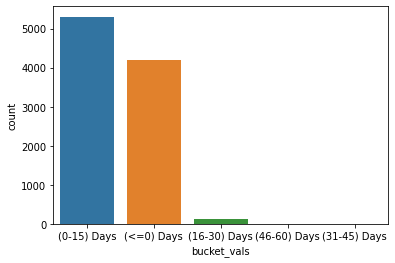

In [144]:
import seaborn as sns
sns.countplot(x = 'bucket_vals',data = test_data) # count ploting bucket values

In [145]:
test_data['bucket_vals'].value_counts() #frequency of bucket values

(0-15) Days     5305
(<=0) Days      4200
(16-30) Days     133
(46-60) Days       5
(31-45) Days       1
Name: bucket_vals, dtype: int64

## Feature Scaling

In [146]:
# X_train = test_data.drop(['clear_date' , 'delay' , 'bucket_vals'],axis = 1)
# y_train = test_data['delay']
# X_val = test_data.drop(['clear_date' , 'delay' , 'bucket_vals'],axis = 1)
# y_val = d_val['delay']

In [147]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [148]:
# X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
# X_train.head()

In [149]:
# X_val = pd.DataFrame(scaler.fit_transform(X_val), index=X_val.index, columns=X_val.columns)
# X_val.head()

In [150]:
# Not performing feature scaling as it is reducing the accuracy drastically

### Calculating Root mean square and mean square

In [151]:
# Root mean square and mean error square for linear regression
y_predict = lr_clf.predict(X_test)

from sklearn import metrics
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_predict, squared=False))
print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_predict, squared=False)))

Mean Squared error :  10.401465879695717
Root Mean Squared error :  3.2251303663101307


In [152]:
# Root mean square and mean square error for Random forest Model 
y_predict = random_forest_model.predict(X_test)

from sklearn import metrics
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_predict, squared=False))
print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_predict, squared=False)))

Mean Squared error :  8.526324844916282
Root Mean Squared error :  2.919987130950457


## Converting dates from ordinal format to time date format

In [153]:
test_data = test_data.astype({'predicted_clear_date':'int32','posting_date':'int32','document_create_date':'int32','due_in_date':'int32','baseline_create_date':'int32'})

In [154]:
test_data['predicted_clear_date']=test_data['predicted_clear_date'].apply(dt.datetime.fromordinal)
test_data['posting_date']=test_data['posting_date'].apply(dt.datetime.fromordinal)
test_data['document_create_date']=test_data['document_create_date'].apply(dt.datetime.fromordinal)
test_data['due_in_date']=test_data['due_in_date'].apply(dt.datetime.fromordinal)
test_data['baseline_create_date']=test_data['baseline_create_date'].apply(dt.datetime.fromordinal)
test_data.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date,bucket_vals
14,1.0,9179.0,1.930630e+09,2020-03-11,2020-03-10,2020-03-26,14169.42,2020-03-11,405.0,1.930630e+09,2,2020-03-28,(0-15) Days
15,1.0,9179.0,1.930733e+09,2020-04-02,2020-04-02,2020-04-17,64394.42,2020-04-02,405.0,1.930733e+09,3,2020-04-20,(0-15) Days
22,1.0,9179.0,1.930834e+09,2020-04-29,2020-04-29,2020-05-14,25333.15,2020-04-29,3025.0,1.930834e+09,0,2020-05-14,(<=0) Days
35,1.0,9179.0,1.930643e+09,2020-03-12,2020-03-12,2020-03-27,2183.30,2020-03-12,4035.0,1.930643e+09,10,2020-04-06,(0-15) Days
54,1.0,9179.0,1.930724e+09,2020-03-31,2020-03-31,2020-04-15,212.41,2020-03-31,4035.0,1.930724e+09,3,2020-04-18,(0-15) Days


In [155]:
test_data.dtypes

USD                            float64
business_code                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms             float64
invoice_id                     float64
delay                            int32
predicted_clear_date    datetime64[ns]
bucket_vals                     object
dtype: object

In [156]:
test_data.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date,bucket_vals
14,1.0,9179.0,1.930630e+09,2020-03-11,2020-03-10,2020-03-26,14169.42,2020-03-11,405.0,1.930630e+09,2,2020-03-28,(0-15) Days
15,1.0,9179.0,1.930733e+09,2020-04-02,2020-04-02,2020-04-17,64394.42,2020-04-02,405.0,1.930733e+09,3,2020-04-20,(0-15) Days
22,1.0,9179.0,1.930834e+09,2020-04-29,2020-04-29,2020-05-14,25333.15,2020-04-29,3025.0,1.930834e+09,0,2020-05-14,(<=0) Days
35,1.0,9179.0,1.930643e+09,2020-03-12,2020-03-12,2020-03-27,2183.30,2020-03-12,4035.0,1.930643e+09,10,2020-04-06,(0-15) Days
54,1.0,9179.0,1.930724e+09,2020-03-31,2020-03-31,2020-04-15,212.41,2020-03-31,4035.0,1.930724e+09,3,2020-04-18,(0-15) Days


In [157]:
test_data.reset_index(drop=True)

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date,bucket_vals
0,1.0,9179.0,1.930630e+09,2020-03-11,2020-03-10,2020-03-26,14169.42,2020-03-11,405.0,1.930630e+09,2,2020-03-28,(0-15) Days
1,1.0,9179.0,1.930733e+09,2020-04-02,2020-04-02,2020-04-17,64394.42,2020-04-02,405.0,1.930733e+09,3,2020-04-20,(0-15) Days
2,1.0,9179.0,1.930834e+09,2020-04-29,2020-04-29,2020-05-14,25333.15,2020-04-29,3025.0,1.930834e+09,0,2020-05-14,(<=0) Days
3,1.0,9179.0,1.930643e+09,2020-03-12,2020-03-12,2020-03-27,2183.30,2020-03-12,4035.0,1.930643e+09,10,2020-04-06,(0-15) Days
4,1.0,9179.0,1.930724e+09,2020-03-31,2020-03-31,2020-04-15,212.41,2020-03-31,4035.0,1.930724e+09,3,2020-04-18,(0-15) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1.0,9179.0,1.930809e+09,2020-04-21,2020-04-21,2020-05-06,14467.62,2020-04-21,405.0,1.930809e+09,1,2020-05-07,(0-15) Days
9640,1.0,9179.0,1.930630e+09,2020-03-11,2020-03-10,2020-03-26,27375.05,2020-03-11,4035.0,1.930630e+09,10,2020-04-05,(0-15) Days
9641,1.0,9179.0,1.930660e+09,2020-03-16,2020-03-16,2020-03-31,36176.09,2020-03-16,3025.0,1.930660e+09,7,2020-04-07,(0-15) Days
9642,1.0,9179.0,1.930795e+09,2020-04-16,2020-04-16,2020-05-01,1898.90,2020-04-16,3025.0,1.930795e+09,0,2020-05-01,(<=0) Days


In [158]:
# test_data.to_csv('file_name.csv')
